<a href="https://colab.research.google.com/github/1998Jhonny/Data_Analist_Python/blob/main/Mental_health_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv('mental_health_workplace_survey.csv')
Country_Data = pd.read_csv('Country_Data.csv', sep=";")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EmployeeID              3000 non-null   int64  
 1   Age                     3000 non-null   int64  
 2   Gender                  3000 non-null   object 
 3   Country                 3000 non-null   object 
 4   JobRole                 3000 non-null   object 
 5   Department              3000 non-null   object 
 6   YearsAtCompany          3000 non-null   int64  
 7   WorkHoursPerWeek        3000 non-null   int64  
 8   RemoteWork              3000 non-null   object 
 9   BurnoutLevel            3000 non-null   float64
 10  JobSatisfaction         3000 non-null   float64
 11  StressLevel             3000 non-null   float64
 12  ProductivityScore       3000 non-null   float64
 13  SleepHours              3000 non-null   float64
 14  PhysicalActivityHrs     3000 non-null   

In [ ]:
data.head()

,EmployeeID,Age,Gender,Country,JobRole,Department,YearsAtCompany,WorkHoursPerWeek,RemoteWork,BurnoutLevel,...,CommuteTime,HasMentalHealthSupport,ManagerSupportScore,HasTherapyAccess,MentalHealthDaysOff,SalaryRange,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
0,1001,50,Male,UK,Sales Associate,HR,14,47,No,3.37,...,117,No,3.15,Yes,8,40K-60K,8.82,6,9.20,0
1,1002,36,Male,Germany,Software Engineer,IT,1,59,Hybrid,7.39,...,8,Yes,4.40,Yes,4,80K-100K,2.80,45,8.46,1
2,1003,29,Non-binary,India,IT Admin,IT,13,59,Hybrid,7.10,...,75,No,3.63,No,6,80K-100K,7.28,7,7.96,1
3,1004,42,Male,Australia,HR Specialist,IT,15,31,Yes,4.18,...,43,Yes,4.50,Yes,9,60K-80K,1.31,11,8.90,0
4,1005,40,Male,Brazil,Customer Support,Support,6,34,Yes,8.28,...,58,Yes,5.51,Yes,6,<40K,1.17,18,8.88,1


In [ ]:
data.columns

Index(['EmployeeID', 'Age', 'Gender', 'Country', 'JobRole', 'Department',
       'YearsAtCompany', 'WorkHoursPerWeek', 'RemoteWork', 'BurnoutLevel',
       'JobSatisfaction', 'StressLevel', 'ProductivityScore', 'SleepHours',
       'PhysicalActivityHrs', 'CommuteTime', 'HasMentalHealthSupport',
       'ManagerSupportScore', 'HasTherapyAccess', 'MentalHealthDaysOff',
       'SalaryRange', 'WorkLifeBalanceScore', 'TeamSize', 'CareerGrowthScore',
       'BurnoutRisk'],
      dtype='object')

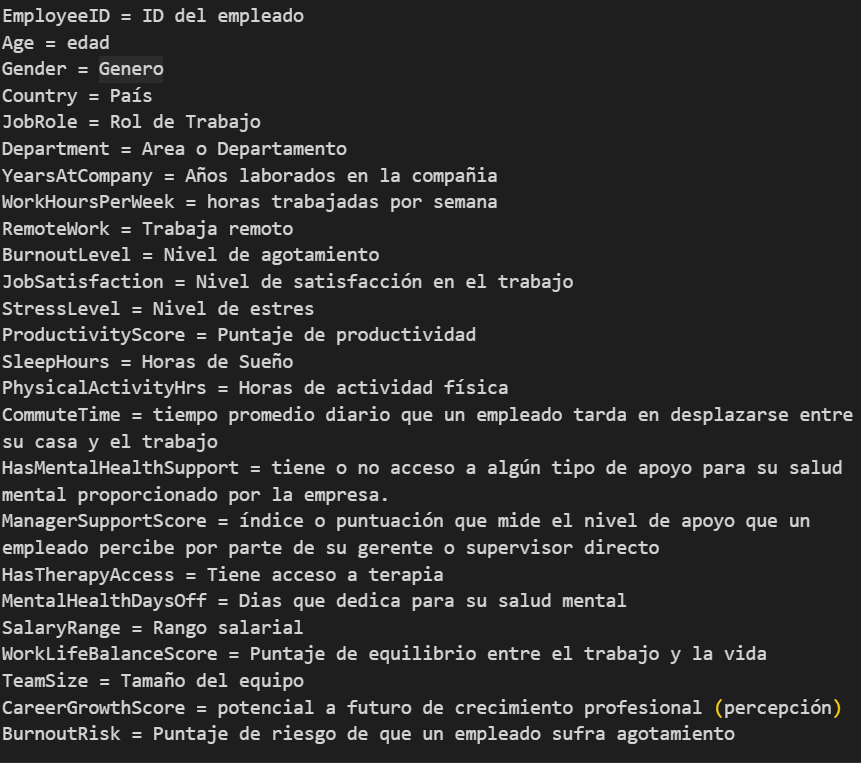

1.	¿Cuál es el promedio, mínimo, máximo y desviación estándar de cada variable cuantitativa?

In [ ]:
# Select columns with int64 and float64 data types
quantitative_columns = data.select_dtypes(include=['int64', 'float64'])

# Calculate descriptive statistics for selected columns
descriptive_stats_quantitative = quantitative_columns.describe()

# Display the results
display(descriptive_stats_quantitative)

,EmployeeID,Age,YearsAtCompany,WorkHoursPerWeek,BurnoutLevel,JobSatisfaction,StressLevel,ProductivityScore,SleepHours,PhysicalActivityHrs,CommuteTime,ManagerSupportScore,MentalHealthDaysOff,WorkLifeBalanceScore,TeamSize,CareerGrowthScore,BurnoutRisk
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.00000,3000.00000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000
mean,2500.500000,40.805667,10.099333,44.504000,5.509137,5.43750,5.51535,5.51956,6.539000,5.030400,59.227000,5.44254,4.544667,5.450950,25.20100,5.520680,0.326667
std,866.169729,11.011705,6.035032,8.491526,2.574072,2.59443,2.60361,2.60761,1.441876,2.861026,34.809779,2.59740,2.854129,2.602379,14.08645,2.566861,0.469072
min,1001.000000,22.000000,0.000000,30.000000,1.000000,1.00000,1.00000,1.00000,4.000000,0.000000,0.000000,1.00000,0.000000,1.000000,1.00000,1.000000,0.000000
25%,1750.750000,31.000000,5.000000,37.000000,3.300000,3.18000,3.26000,3.28000,5.300000,2.600000,29.000000,3.16000,2.000000,3.160000,13.00000,3.300000,0.000000
50%,2500.500000,41.000000,10.000000,45.000000,5.480000,5.43000,5.49500,5.49000,6.600000,5.000000,59.000000,5.44000,5.000000,5.425000,25.00000,5.580000,0.000000
75%,3250.250000,50.000000,15.000000,52.000000,7.640000,7.68000,7.82250,7.80250,7.800000,7.500000,90.000000,7.69000,7.000000,7.730000,37.00000,7.642500,1.000000
max,4000.000000,59.000000,20.000000,59.000000,10.000000,10.00000,10.00000,10.00000,9.000000,10.000000,119.000000,9.99000,9.000000,10.000000,49.00000,9.990000,1.000000


Conteo de variables cualitativas

In [ ]:
Gender_counts = data['Gender'].value_counts()
country_counts = data['Country'].value_counts()
rol_counts = data['JobRole'].value_counts()
department_counts = data['Department'].value_counts()


display(Gender_counts)
display(country_counts)
display(rol_counts)
display(department_counts)

,count
Gender,
Non-binary,757
Prefer not to say,757
Male,752
Female,734


,count
Country,
India,464
Brazil,443
Canada,434
UK,427
Australia,418
USA,408
Germany,406


,count
JobRole,
Data Scientist,411
Software Engineer,401
Customer Support,380
Marketing Manager,372
Project Manager,362
HR Specialist,361
IT Admin,358
Sales Associate,355


,count
Department,
HR,525
Sales,522
Marketing,521
Engineering,488
IT,482
Support,462


PIB PERCAPITA de los Paises análizados según datosmacro

In [ ]:
Country_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    199 non-null    object
 1   Fecha                      199 non-null    int64 
 2   PIB Per Capita €           199 non-null    int64 
 3   Var. anual PIB Per Capita  199 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [ ]:
# Unificamos por la columna "Country"
merged_data = pd.merge(data[['Country']], Country_Data[['Country', 'PIB Per Capita €']], on='Country', how='left')

# Eliminamos duplicados (ya que 'data' podría tener muchas filas por país)
unique_pib = merged_data.drop_duplicates(subset='Country').reset_index(drop=True)

# Mostramos el resultado
display(unique_pib)

,Country,PIB Per Capita €
0,UK,49172
1,Germany,50830
2,India,2512
3,Australia,61614
4,Brazil,9479
5,USA,79305
6,Canada,50342


Nivel de estres y agotamiento (diferencia) por pais

In [ ]:
# Agrupar por país y calcular promedios
promedios_por_pais = data.groupby('Country')[['StressLevel', 'BurnoutLevel']].mean().round(2)

# Calcular la diferencia y añadirla como nueva columna
promedios_por_pais['Diferencia (Burnout - Stress)'] = (
    promedios_por_pais['BurnoutLevel'] - promedios_por_pais['StressLevel']
).round(2)

# Mostrar los resultados
display(promedios_por_pais)


,StressLevel,BurnoutLevel,Diferencia (Burnout - Stress)
Country,,,
Australia,5.47,5.39,-0.08
Brazil,5.49,5.49,0.00
Canada,5.38,5.60,0.22
Germany,5.58,5.51,-0.07
India,5.38,5.52,0.14
UK,5.63,5.51,-0.12
USA,5.71,5.55,-0.16


Roles de trabajo por Pais

In [ ]:
# Conteo de JobRoles por país
conteo_jobrole_pais = data.groupby(['Country', 'JobRole']).size().unstack(fill_value=0)

# Mostrar el resultado
display(conteo_jobrole_pais)

JobRole,Customer Support,Data Scientist,HR Specialist,IT Admin,Marketing Manager,Project Manager,Sales Associate,Software Engineer
Country,,,,,,,,
Australia,46,55,49,54,47,60,43,64
Brazil,46,68,61,50,58,48,60,52
Canada,55,59,54,55,53,42,54,62
Germany,54,61,45,44,46,56,43,57
India,74,65,59,57,50,58,45,56
UK,47,60,49,55,60,43,61,52
USA,58,43,44,43,58,55,49,58


Roles por género

In [ ]:
# Conteo de JobRoles por género
conteo_jobrole_genero = data.groupby(['Gender', 'JobRole']).size().unstack(fill_value=0)

# Mostrar el resultado
display(conteo_jobrole_genero)

JobRole,Customer Support,Data Scientist,HR Specialist,IT Admin,Marketing Manager,Project Manager,Sales Associate,Software Engineer
Gender,,,,,,,,
Female,89,102,90,84,95,82,86,106
Male,98,110,87,79,97,94,97,90
Non-binary,95,100,81,103,90,99,93,96
Prefer not to say,98,99,103,92,90,87,79,109


In [ ]:
distribucion_Salarial = data['SalaryRange'].value_counts()
display(distribucion_Salarial)

,count
SalaryRange,
100K+,640
80K-100K,600
<40K,594
40K-60K,593
60K-80K,573


¿Cuál es el tamaño promedio de los equipos (TeamSize) por pais?

In [ ]:
# Calcular el tamaño promedio del equipo por país
promedio_team_size = data.groupby('Country')['TeamSize'].mean().round(2)

# Mostrar el resultado
display(promedio_team_size)

,TeamSize
Country,
Australia,24.39
Brazil,25.71
Canada,25.46
Germany,25.94
India,24.96
UK,25.16
USA,24.77


In [ ]:
# Agrupar por rango de edad y calcular el promedio de BurnoutLevel
burnout_por_edad = data.groupby('Age')['BurnoutLevel'].mean().round(2)

# Mostrar resultados
display(burnout_por_edad)


,BurnoutLevel
Age,
22,5.28
23,5.79
24,5.13
25,6.03
26,5.58
27,5.65
28,5.46
29,5.31
30,5.44


¿Qué rango de edad tiene mayores niveles promedio de BurnoutLevel y cuáles los menores?

In [ ]:
# Crear columna de rangos de edad usando las edades ya existentes
data['AgeRange'] = pd.cut(
    data['Age'],
    bins=[21, 30, 40, 50, 59],
    labels=['22–30', '31–40', '41–50', '51–59'],
    right=True
)

# Agrupar por rango de edad y calcular promedio de BurnoutLevel
burnout_por_rango = data.groupby('AgeRange')['BurnoutLevel'].mean().round(2)

# Mostrar resultado
display(burnout_por_rango)

/tmp/ipython-input-17-2202154455.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  burnout_por_rango = data.groupby('AgeRange')['BurnoutLevel'].mean().round(2)


,BurnoutLevel
AgeRange,
22–30,5.52
31–40,5.61
41–50,5.40
51–59,5.51


¿Cuál género trabaja más horas a la semana en promedio?

In [ ]:
# Filtrar solo Male y Female y calcular promedio de horas trabajadas por semana
promedio_horas_mf = data[data['Gender'].isin(['Male', 'Female'])] \
    .groupby('Gender')['WorkHoursPerWeek'].mean().round(2)

# Mostrar resultados
display(promedio_horas_mf)

,WorkHoursPerWeek
Gender,
Female,44.77
Male,44.61


¿Cuál género tiene mayor BurnoutRisk?

In [ ]:
# Filtrar solo Male y Female y calcular promedio de BurnoutRisk
burnout_risk_mf = data[data['Gender'].isin(['Male', 'Female'])] \
    .groupby('Gender')['BurnoutRisk'].mean().round(2)

# Mostrar resultados
display(burnout_risk_mf)

,BurnoutRisk
Gender,
Female,0.31
Male,0.33


¿Los empleados que trabajan remotamente tienen menor StressLevel que los presenciales?

In [ ]:
# Agrupar por condición de trabajo remoto y calcular el promedio de StressLevel
stress_by_remote = data.groupby('RemoteWork')['StressLevel'].mean().round(2)

# Mostrar resultados
display(stress_by_remote)

,StressLevel
RemoteWork,
Hybrid,5.61
No,5.50
Yes,5.43


¿Cómo varía la productividad (ProductivityScore) por departamento o país?

In [ ]:
# Agrupar por país y calcular promedio de ProductivityScore
productividad_por_pais = data.groupby('Country')['ProductivityScore'].mean().round(2)

# Mostrar resultados
display(productividad_por_pais)

,ProductivityScore
Country,
Australia,5.56
Brazil,5.59
Canada,5.56
Germany,5.40
India,5.49
UK,5.51
USA,5.53


¿Qué JobRole tiene el mayor promedio de BurnoutLevel?

In [ ]:
# Agrupar por JobRole y calcular promedio de BurnoutLevel
burnout_por_rol = data.groupby('JobRole')['BurnoutLevel'].mean().round(2)

# Ordenar de mayor a menor
burnout_por_rol_ordenado = burnout_por_rol.sort_values(ascending=False)

# Mostrar el JobRole con mayor promedio de BurnoutLevel
display(burnout_por_rol_ordenado.head(8))

,BurnoutLevel
JobRole,
HR Specialist,5.64
Software Engineer,5.61
Sales Associate,5.55
Project Manager,5.51
Data Scientist,5.48
Marketing Manager,5.44
Customer Support,5.42
IT Admin,5.41


12.	¿Qué Department tiene el mejor WorkLifeBalanceScore?

In [ ]:
# Agrupar por Department y calcular el promedio de WorkLifeBalanceScore
wlb_por_departamento = data.groupby('Department')['WorkLifeBalanceScore'].mean().round(2)

# Ordenar de mayor a menor para ver el mejor puntaje
wlb_ordenado = wlb_por_departamento.sort_values(ascending=False)

# Mostrar el Department con el mejor WorkLifeBalanceScore
display(wlb_ordenado.head(6))


,WorkLifeBalanceScore
Department,
Sales,5.70
Support,5.45
IT,5.44
Marketing,5.43
HR,5.34
Engineering,5.34


¿Qué SalaryRange está asociado a mayor JobSatisfaction?

In [ ]:
# Agrupar por SalaryRange y calcular el promedio de JobSatisfaction
satisfaccion_por_salario = data.groupby('SalaryRange')['JobSatisfaction'].mean().round(2)

# Ordenar de mayor a menor para encontrar el rango con más satisfacción
satisfaccion_ordenada = satisfaccion_por_salario.sort_values(ascending=False)

# Mostrar el rango con mayor satisfacción laboral
display(satisfaccion_ordenada.head(5))


,JobSatisfaction
SalaryRange,
60K-80K,5.60
80K-100K,5.46
40K-60K,5.45
<40K,5.35
100K+,5.34


¿Qué países tienen el menor nivel promedio de StressLevel?

In [ ]:
# Agrupar por país y calcular el promedio de StressLevel
stress_por_pais = data.groupby('Country')['StressLevel'].mean().round(2)

# Ordenar de menor a mayor
stress_menor = stress_por_pais.sort_values(ascending=False)

# Mostrar los países con menor StressLevel promedio
display(stress_menor.head(7))


,StressLevel
Country,
USA,5.71
UK,5.63
Germany,5.58
Brazil,5.49
Australia,5.47
Canada,5.38
India,5.38


¿Existe correlación entre WorkHoursPerWeek y BurnoutLevel?

In [ ]:
# Calcular la correlación de Pearson entre WorkHoursPerWeek y BurnoutLevel
correlacion = data['WorkHoursPerWeek'].corr(data['BurnoutLevel'])

print(f"Correlación entre WorkHoursPerWeek y BurnoutLevel: {correlacion:.2f}")

Correlación entre WorkHoursPerWeek y BurnoutLevel: -0.02


¿Qué relación hay entre SleepHours y ProductivityScore?

In [ ]:
# Correlación de Pearson
correlacion = data['SleepHours'].corr(data['ProductivityScore'])
print(f"Correlación entre SleepHours y ProductivityScore: {correlacion:.2f}")

Correlación entre SleepHours y ProductivityScore: 0.00


¿Mayor ManagerSupportScore se asocia con menor StressLevel?

In [ ]:
correlacion = data['ManagerSupportScore'].corr(data['StressLevel'])
print(f"Correlación entre ManagerSupportScore y StressLevel: {correlacion:.2f}")

Correlación entre ManagerSupportScore y StressLevel: -0.04


¿El CareerGrowthScore está relacionado con mayor JobSatisfaction?

In [ ]:
correlacion = data['CareerGrowthScore'].corr(data['JobSatisfaction'])
print(f"Correlación entre CareerGrowthScore y JobSatisfaction: {correlacion:.2f}")

Correlación entre CareerGrowthScore y JobSatisfaction: -0.03


¿A mayor CommuteTime, mayor BurnoutLevel o menor SleepHours?

In [ ]:
# Correlación entre CommuteTime y BurnoutLevel
corr_burnout = data['CommuteTime'].corr(data['BurnoutLevel'])

# Correlación entre CommuteTime y SleepHours
corr_sleep = data['CommuteTime'].corr(data['SleepHours'])

print(f"Correlación entre CommuteTime y BurnoutLevel: {corr_burnout:.2f}")
print(f"Correlación entre CommuteTime y SleepHours: {corr_sleep:.2f}")

Correlación entre CommuteTime y BurnoutLevel: 0.01
Correlación entre CommuteTime y SleepHours: 0.01


¿La PhysicalActivityHrs tiene relación con StressLevel o BurnoutLevel?

In [ ]:
# Correlación entre actividad física y nivel de estrés
corr_stress = data['PhysicalActivityHrs'].corr(data['StressLevel'])

# Correlación entre actividad física y nivel de burnout
corr_burnout = data['PhysicalActivityHrs'].corr(data['BurnoutLevel'])

print(f"Correlación entre PhysicalActivityHrs y StressLevel: {corr_stress:.2f}")
print(f"Correlación entre PhysicalActivityHrs y BurnoutLevel: {corr_burnout:.2f}")

Correlación entre PhysicalActivityHrs y StressLevel: -0.02
Correlación entre PhysicalActivityHrs y BurnoutLevel: -0.02


Condicionales y probabilísticas

¿Cuál es el porcentaje de empleados con BurnoutRisk alto (BurnoutRisk = 1) que tienen HasMentalHealthSupport = 'No'?

In [ ]:
# Filtrar empleados con alto riesgo de burnout
alto_riesgo = data[data['BurnoutRisk'] == 1]

# De estos, cuántos no tienen apoyo en salud mental
sin_apoyo = alto_riesgo[alto_riesgo['HasMentalHealthSupport'] == 'No']

# Calcular porcentaje
porcentaje = (len(sin_apoyo) / len(alto_riesgo)) * 100

print(f"Porcentaje de empleados con alto riesgo de burnout y sin apoyo en salud mental: {porcentaje:.2f}%")

Porcentaje de empleados con alto riesgo de burnout y sin apoyo en salud mental: 50.92%


In [ ]:
media_stress = data['StressLevel'].mean()
estrés_mayor_media = data[data['StressLevel'] > media_stress]
proporcion_con_terapia = (estrés_mayor_media['HasMentalHealthSupport'] == 'Yes').mean()
print(f"Proporción de empleados con StressLevel > media ({media_stress:.2f}) que tienen acceso a terapia: {proporcion_con_terapia:.2%}")

Proporción de empleados con StressLevel > media (5.52) que tienen acceso a terapia: 48.53%


In [ ]:
# Paso 1: Calcular la media de BurnoutLevel
mean_burnout = data['BurnoutLevel'].mean()

# Paso 2: Filtrar los empleados que trabajan más de 50 horas a la semana
trabajadores_mas_50h = data[data['WorkHoursPerWeek'] > 50]

# Paso 3: Dentro de ese grupo, contar cuántos tienen BurnoutLevel > media
casos_burnout_alto = trabajadores_mas_50h[trabajadores_mas_50h['BurnoutLevel'] > mean_burnout]

# Paso 4: Calcular la probabilidad (proporción)
probabilidad = len(casos_burnout_alto) / len(trabajadores_mas_50h)

# Mostrar resultado
print(f"Probabilidad de burnout alto entre quienes trabajan >50h/semana: {probabilidad:.2%}")

Probabilidad de burnout alto entre quienes trabajan >50h/semana: 47.98%


In [ ]:
# Paso 1: Calcular la media de BurnoutLevel
mean_burnout = data['BurnoutLevel'].mean()

# Paso 2: Filtrar empleados que trabajan remotamente
trabajadores_remotos = data[data['RemoteWork'] == 'Yes']

# Paso 3: De esos, contar cuántos tienen BurnoutLevel < media
bajo_burnout = trabajadores_remotos[trabajadores_remotos['BurnoutLevel'] < mean_burnout]

# Paso 4: Calcular porcentaje
porcentaje = len(bajo_burnout) / len(trabajadores_remotos) * 100

# Mostrar resultado
print(f"Porcentaje de empleados remotos con bajo nivel de burnout: {porcentaje:.2f}%")

Porcentaje de empleados remotos con bajo nivel de burnout: 49.49%


In [ ]:
data['ManagerSupportScore'].head(5)

,ManagerSupportScore
0,3.15
1,4.40
2,3.63
3,4.50
4,5.51


In [ ]:
# Filtrar empleados con bajo apoyo del manager (<3)
bajo_apoyo = data[data['ManagerSupportScore'] < 3
                  ]

# De esos, cuántos tienen BurnoutRisk = 1 (alto riesgo)
bajo_apoyo_alto_burnout = bajo_apoyo[bajo_apoyo['BurnoutRisk'] == 1]

# Contar
cantidad = len(bajo_apoyo_alto_burnout)

# Mostrar resultado
print(f"Cantidad de empleados con ManagerSupportScore < 3 y BurnoutRisk alto: {cantidad}")

Cantidad de empleados con ManagerSupportScore < 3 y BurnoutRisk alto: 234


Productividad y desempeño

¿Qué factores están asociados a un alto ProductivityScore?

In [ ]:
data['HighProductivity'] = data['ProductivityScore'] > mean_productivity

# Comparar promedios entre grupos
group_means = data.groupby('HighProductivity').mean(numeric_only=True)
print(group_means.T)

HighProductivity            False        True 
EmployeeID            2480.883721  2520.247492
Age                     40.568771    41.044147
YearsAtCompany          10.188040    10.010033
WorkHoursPerWeek        44.839867    44.165886
BurnoutLevel             5.546890     5.471130
JobSatisfaction          5.374233     5.501191
StressLevel              5.541841     5.488682
ProductivityScore        3.260950     7.793278
SleepHours               6.563588     6.514247
PhysicalActivityHrs      5.040199     5.020535
CommuteTime             59.134884    59.319732
ManagerSupportScore      5.453548     5.431458
MentalHealthDaysOff      4.572093     4.517057
WorkLifeBalanceScore     5.403694     5.498522
TeamSize                25.100997    25.301672
CareerGrowthScore        5.549409     5.491759
BurnoutRisk              0.333555     0.319732


modelo de regresión para ver asociación

In [ ]:
# Selecciona algunas variables que podrían influir
X = data[['WorkHoursPerWeek', 'SleepHours', 'StressLevel', 'ManagerSupportScore',
          'CareerGrowthScore', 'WorkLifeBalanceScore', 'PhysicalActivityHrs']]
y = data['ProductivityScore']

# Agregar constante
X = sm.add_constant(X)

# Modelo
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ProductivityScore   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9351
Date:                Mon, 28 Jul 2025   Prob (F-statistic):              0.478
Time:                        23:34:44   Log-Likelihood:                -7128.3
No. Observations:                3000   AIC:                         1.427e+04
Df Residuals:                    2992   BIC:                         1.432e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.0522 

¿Cuál es el promedio de ProductivityScore por WorkHoursPerWeek?

In [ ]:
data.groupby('WorkHoursPerWeek')['ProductivityScore'].mean()

,ProductivityScore
WorkHoursPerWeek,
30,5.966941
31,5.678440
32,5.561348
33,5.468824
34,5.877692
35,5.780865
36,6.114519
37,5.620294
38,5.244206


¿Qué Department tiene la mayor productividad promedio?

In [ ]:
data.groupby('Department')['ProductivityScore'].mean().sort_values(ascending=False)

,ProductivityScore
Department,
HR,5.609429
Support,5.570844
Sales,5.547337
Engineering,5.486988
Marketing,5.454146
IT,5.446120


¿Los empleados con más CareerGrowthScore son más productivos?

In [ ]:
data['CareerGrowthScore'].corr(data['ProductivityScore'])

np.float64(-0.002359129124421559)

¿Qué TeamSize es óptimo para un mayor ProductivityScore?

In [ ]:
data.groupby('TeamSize')['ProductivityScore'].mean().sort_values(ascending=False)

,ProductivityScore
TeamSize,
48,6.173404
5,6.029839
18,6.024035
30,6.021875
42,6.012667
11,5.977377
8,5.969583
49,5.951029
38,5.867083


In [ ]:
# Agrupar en rangos personalizados
data['TeamSizeGroup'] = pd.cut(data['TeamSize'],
                               bins=[0, 5, 10, 15, 20, 25, 30, 40, 50],
                               labels=['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-40', '41-49'])

# Calcular la productividad promedio por grupo
productividad_por_grupo = data.groupby('TeamSizeGroup')['ProductivityScore'].mean().sort_values(ascending=False)

display(productividad_por_grupo)

/tmp/ipython-input-69-3663753557.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productividad_por_grupo = data.groupby('TeamSizeGroup')['ProductivityScore'].mean().sort_values(ascending=False)


,ProductivityScore
TeamSizeGroup,
16-20,5.711705
41-49,5.650915
6-10,5.586042
21-25,5.540505
26-30,5.495049
11-15,5.487867
1-5,5.431042
31-40,5.332308


¿Qué variables están más asociadas a altos niveles de StressLevel?

In [ ]:
# Seleccionar solo variables numéricas
numericas = data.select_dtypes(include='number')

# Calcular correlaciones con StressLevel
correlaciones = numericas.corr()['StressLevel'].sort_values(ascending=False)

display(correlaciones)

,StressLevel
StressLevel,1.000000
TeamSize,0.024669
BurnoutLevel,0.014534
SleepHours,0.014476
EmployeeID,0.011300
MentalHealthDaysOff,0.011258
WorkLifeBalanceScore,0.010245
CareerGrowthScore,0.004509
BurnoutRisk,0.001984
Age,-0.003344


¿Los empleados con acceso a terapia (HasTherapyAccess = 'Yes') tienen menor StressLevel?

In [ ]:
data.groupby('HasTherapyAccess')['StressLevel'].mean()

,StressLevel
HasTherapyAccess,
No,5.455407
Yes,5.576179


¿Cuántas horas de sueño están asociadas con menor BurnoutLevel?

In [ ]:
# Crear bins personalizados
bins = [3.9, 5, 6, 7, 8, 9.1]
labels = ['≤5h', '5-6h', '6-7h', '7-8h', '≥8h']

data['SleepGroup'] = pd.cut(data['SleepHours'], bins=bins, labels=labels, right=False)

In [ ]:
# Agrupar y calcular el promedio de BurnoutLevel
avg_burnout_by_sleep = data.groupby('SleepGroup')['BurnoutLevel'].mean().sort_values()

display(avg_burnout_by_sleep)

/tmp/ipython-input-83-3316167588.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_burnout_by_sleep = data.groupby('SleepGroup')['BurnoutLevel'].mean().sort_values()


,BurnoutLevel
SleepGroup,
7-8h,5.334030
5-6h,5.521260
6-7h,5.537855
≤5h,5.557314
≥8h,5.612783


¿Qué combinación de SleepHours y PhysicalActivityHrs se asocia con menor estrés?

In [ ]:
# Crear rangos para horas de sueño
data['SleepCategory'] = pd.cut(data['SleepHours'],
                               bins=[0, 5, 6, 7, 8, 9, 10],
                               labels=['≤5h', '5-6h', '6-7h', '7-8h', '8-9h', '≥9h'])

# Crear rangos para actividad física
data['ActivityCategory'] = pd.cut(data['PhysicalActivityHrs'],
                                  bins=[-0.1, 1, 3, 5, 7, 9, 10],
                                  labels=['≤1h', '1-3h', '3-5h', '5-7h', '7-9h', '≥9h'])

/tmp/ipython-input-87-3626860039.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_by_combo = data.groupby(['SleepCategory', 'ActivityCategory'])['StressLevel'].mean().unstack()


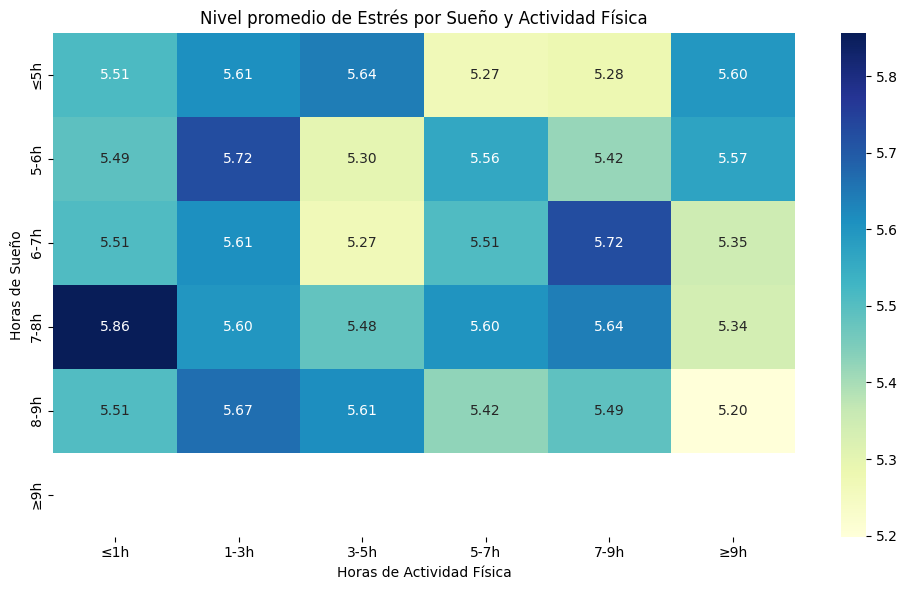

In [ ]:
# Calcular promedio de estrés por combinación de rangos
stress_by_combo = data.groupby(['SleepCategory', 'ActivityCategory'])['StressLevel'].mean().unstack()

# Mostrar resultados
plt.figure(figsize=(10, 6))
sns.heatmap(stress_by_combo, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Nivel promedio de Estrés por Sueño y Actividad Física')
plt.xlabel('Horas de Actividad Física')
plt.ylabel('Horas de Sueño')
plt.tight_layout()
plt.show()

¿Cómo se comporta un WellbeingScore que combine:
SleepHours, PhysicalActivityHrs, ManagerSupportScore, WorkLifeBalanceScore, y StressLevel?


In [ ]:
# Normalizamos cada variable en una escala de 0 a 1
data['Sleep_norm'] = (data['SleepHours'] - data['SleepHours'].min()) / (data['SleepHours'].max() - data['SleepHours'].min())
data['Activity_norm'] = (data['PhysicalActivityHrs'] - data['PhysicalActivityHrs'].min()) / (data['PhysicalActivityHrs'].max() - data['PhysicalActivityHrs'].min())
data['Manager_norm'] = (data['ManagerSupportScore'] - data['ManagerSupportScore'].min()) / (data['ManagerSupportScore'].max() - data['ManagerSupportScore'].min())
data['Balance_norm'] = (data['WorkLifeBalanceScore'] - data['WorkLifeBalanceScore'].min()) / (data['WorkLifeBalanceScore'].max() - data['WorkLifeBalanceScore'].min())
data['Stress_norm'] = (data['StressLevel'].max() - data['StressLevel']) / (data['StressLevel'].max() - data['StressLevel'].min())

# Creamos el WellbeingScore combinando los factores positivos y restando el estrés
data['WellbeingScore'] = (
    0.25 * data['Sleep_norm'] +
    0.2  * data['Activity_norm'] +
    0.2  * data['Manager_norm'] +
    0.2  * data['Balance_norm'] +
    0.15 * data['Stress_norm']
)

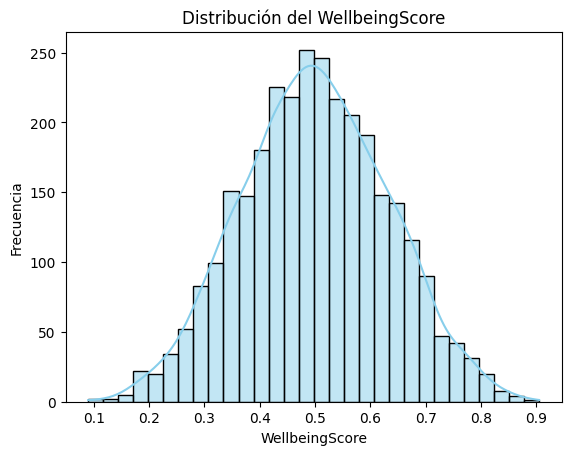

In [ ]:
sns.histplot(data['WellbeingScore'], bins=30, kde=True, color='skyblue')
plt.title("Distribución del WellbeingScore")
plt.xlabel("WellbeingScore")
plt.ylabel("Frecuencia")
plt.show()

¿Se puede crear un índice de riesgo de abandono combinando bajo crecimiento, alto estrés, y bajo salario?

In [ ]:
salary_mapping = {
    '<40K': 0,
    '40K-60K': 1,
    '60K-80K': 2,
    '80K-100K': 3,
    '100K+': 4
}

data['SalaryOrdinal'] = data['SalaryRange'].map(salary_mapping)

In [ ]:
data['Salary_norm'] = 1 - data['SalaryOrdinal'] / data['SalaryOrdinal'].max()

In [ ]:
# Normalización de crecimiento profesional (bajo crecimiento = más riesgo)
data['Growth_norm'] = 1 - (data['CareerGrowthScore'] - data['CareerGrowthScore'].min()) / (
    data['CareerGrowthScore'].max() - data['CareerGrowthScore'].min())

# Normalización de estrés (alto estrés = más riesgo)
data['Stress_norm'] = (data['StressLevel'] - data['StressLevel'].min()) / (
    data['StressLevel'].max() - data['StressLevel'].min())

# Índice final (ajustable)
data['AttritionRiskIndex'] = (
    0.4 * data['Growth_norm'] +
    0.35 * data['Stress_norm'] +
    0.25 * data['Salary_norm']
)

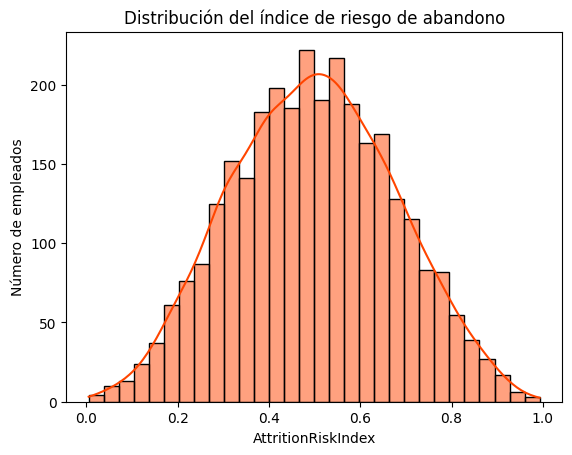

In [ ]:
sns.histplot(data['AttritionRiskIndex'], bins=30, kde=True, color='orangered')
plt.title("Distribución del índice de riesgo de abandono")
plt.xlabel("AttritionRiskIndex")
plt.ylabel("Número de empleados")
plt.show()

In [ ]:
high_risk = data[data['AttritionRiskIndex'] > 0.7]
display(high_risk[['EmployeeID', 'CareerGrowthScore', 'StressLevel', 'SalaryRange', 'AttritionRiskIndex']].head())

,EmployeeID,CareerGrowthScore,StressLevel,SalaryRange,AttritionRiskIndex
13,1014,2.33,9.45,60K-80K,0.794434
16,1017,2.37,7.41,40K-60K,0.775821
28,1029,1.74,6.36,60K-80K,0.700519
30,1031,1.66,3.74,<40K,0.727190
35,1036,2.53,9.55,80K-100K,0.726924


¿Qué grupo de edad tiene mejor equilibrio vida-trabajo?

In [ ]:
bins = [20, 30, 40, 50, 60]
labels = ['20-29', '30-39', '40-49', '50-59']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
age_group_balance = data.groupby('AgeGroup')['WorkLifeBalanceScore'].mean().sort_values(ascending=False)
display(age_group_balance)

/tmp/ipython-input-101-3980785762.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_balance = data.groupby('AgeGroup')['WorkLifeBalanceScore'].mean().sort_values(ascending=False)


,WorkLifeBalanceScore
AgeGroup,
20-29,5.496522
40-49,5.495354
30-39,5.411774
50-59,5.406983


¿Qué combinación de variables predice mejor el BurnoutRisk?

In [ ]:
# Copia para evitar cambios sobre el original
df = data.copy()

# Convertir variables categóricas
df['HasTherapyAccess'] = df['HasTherapyAccess'].map({'Yes': 1, 'No': 0})
salary_order = {'<40K': 1, '40K-60K': 2, '60K-80K': 3, '80K-100K': 4, '100K+': 5}
df['SalaryRange'] = df['SalaryRange'].map(salary_order)

# Convertir target (si es categórico) a numérico
le = LabelEncoder()
df['BurnoutRisk'] = le.fit_transform(df['BurnoutRisk'])

# Seleccionar variables
features = ['SleepHours', 'PhysicalActivityHrs', 'WorkHoursPerWeek', 'StressLevel',
            'ManagerSupportScore', 'WorkLifeBalanceScore', 'CareerGrowthScore',
            'HasTherapyAccess', 'SalaryRange']
X = df[features]
y = df['BurnoutRisk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.96      0.79       602
           1       0.37      0.04      0.08       298

    accuracy                           0.66       900
   macro avg       0.52      0.50      0.43       900
weighted avg       0.57      0.66      0.55       900



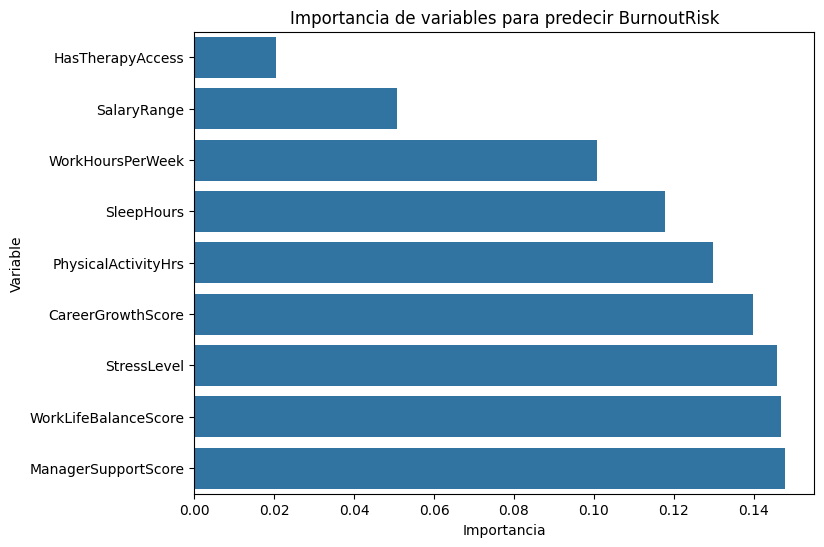

In [ ]:
importances = model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Importancia de variables para predecir BurnoutRisk")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

¿Qué países o departamentos concentran más empleados con BurnoutLevel > 7?

In [ ]:
burnout_by_country = (
    df[df['BurnoutLevel'] > 7]
    .groupby('Country')
    .size()
    .sort_values(ascending=False)
)

display(burnout_by_country)

,0
Country,
India,156
Canada,147
Brazil,143
Germany,140
UK,137
Australia,130
USA,127


In [ ]:
burnout_by_department = (
    df[df['BurnoutLevel'] > 7]
    .groupby('Department')
    .size()
    .sort_values(ascending=False)
)

display(burnout_by_department)

,0
Department,
HR,180
Sales,173
Marketing,170
IT,166
Engineering,150
Support,141


¿Los empleados con menor CommuteTime son más felices (JobSatisfaction)?

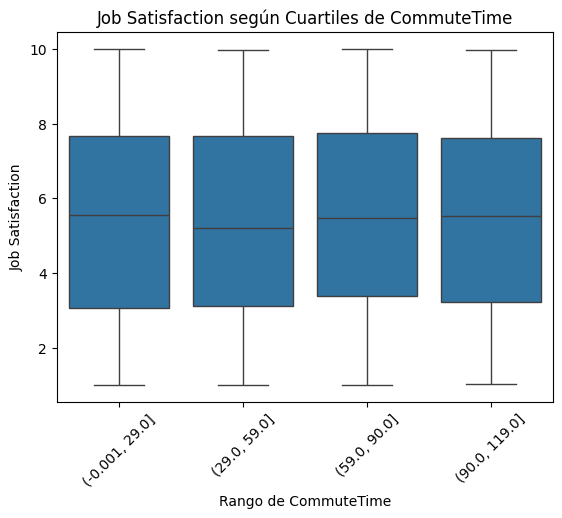

In [ ]:
# Boxplot para ver la relación
sns.boxplot(x=pd.qcut(df['CommuteTime'], q=4), y='JobSatisfaction', data=df)
plt.title('Job Satisfaction según Cuartiles de CommuteTime')
plt.xlabel('Rango de CommuteTime')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

In [ ]:
correlation = df['CommuteTime'].corr(df['JobSatisfaction'])
print(f"Correlación entre CommuteTime y JobSatisfaction: {correlation:.2f}")

Correlación entre CommuteTime y JobSatisfaction: 0.01


In [ ]:
df['CommuteGroup'] = pd.cut(df['CommuteTime'], bins=[0,10,20,30,60,df['CommuteTime'].max()], labels=[
    '0-10 min', '10-20 min', '20-30 min', '30-60 min', '60+ min'
])

grouped = df.groupby('CommuteGroup')['JobSatisfaction'].mean().sort_index()
print(grouped)


CommuteGroup
0-10 min     5.365361
10-20 min    5.456865
20-30 min    5.429216
30-60 min    5.396635
60+ min      5.461902
Name: JobSatisfaction, dtype: float64


/tmp/ipython-input-114-742609596.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('CommuteGroup')['JobSatisfaction'].mean().sort_index()


¿Qué proporción de empleados tienen buena salud mental pero baja satisfacción laboral?

In [ ]:
# Total de empleados
total_empleados = len(data)

# Filtro de buena salud mental y baja satisfacción laboral
grupo_objetivo = data[
    (data['StressLevel'] <= 4) &
    (data['BurnoutLevel'] <= 4) &
    (data['JobSatisfaction'] <= 4)
]

# Proporción
proporcion = len(grupo_objetivo) / total_empleados
print(f"Proporción: {proporcion:.2%}")
print(f"Cantidad: {len(grupo_objetivo)} de {total_empleados}")

Proporción: 3.77%
Cantidad: 113 de 3000
